Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

Reading and cleaning our data

In [2]:
df = pd.read_csv("medical_insurance.csv")
print(df)

       person_id  age     sex   region urban_rural    income     education  \
0          75722   52  Female    North    Suburban   22700.0     Doctorate   
1          80185   79  Female    North       Urban   12800.0         No HS   
2          19865   68    Male    North       Rural   40700.0            HS   
3          76700   15    Male    North    Suburban   15600.0  Some College   
4          92992   53    Male  Central    Suburban   89600.0     Doctorate   
...          ...  ...     ...      ...         ...       ...           ...   
99995       6266   50    Male     West       Urban  127200.0         No HS   
99996      54887   42    Male     East    Suburban   21600.0            HS   
99997      76821   41    Male     West       Rural   81900.0            HS   
99998        861   51  Female    South       Urban   43400.0     Doctorate   
99999      15796   44  Female    South       Rural   43700.0  Some College   

      marital_status employment_status  household_size  ...  li

In [3]:
#checking for missing values
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [4]:
#replacing missing values for alcohol frequency
def fill_alcohol_freq_missing(df):
    df["alcohol_freq"] = df["alcohol_freq"].fillna("daily")
    return df

#filling the values out 
df = fill_alcohol_freq_missing(df)

In [5]:
#checking for missing values after filling out missing values
df.isnull().sum()

person_id                      0
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_med

In [6]:
#checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
#statistical summary of the dataset showing scales of variables - useful to explain the need for standardization
df.describe() 

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [8]:
#listing all columns
df.columns 

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

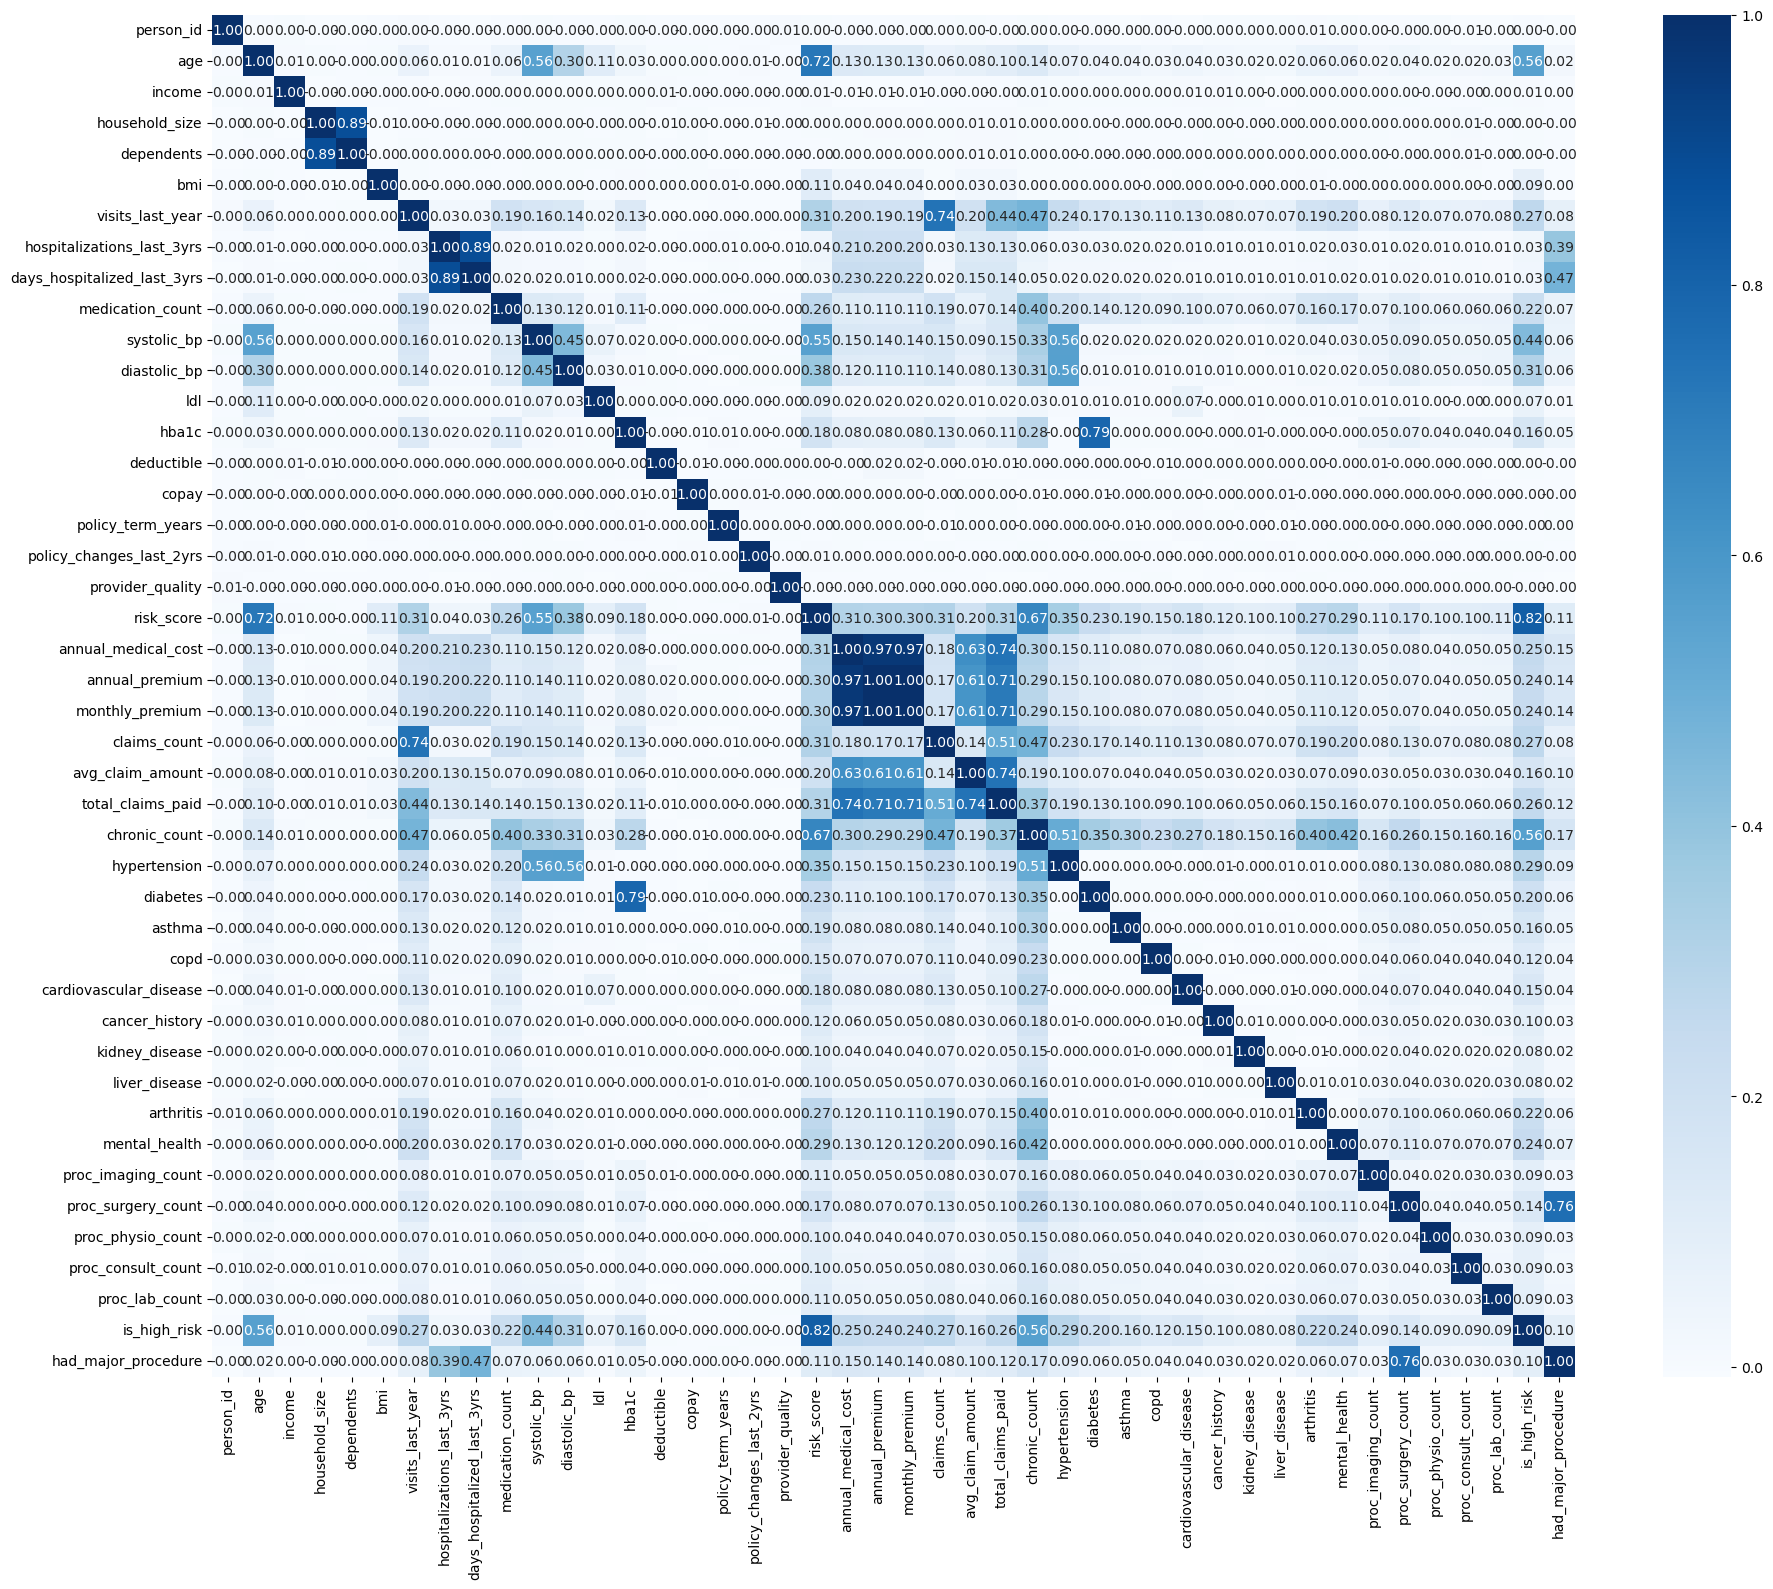

In [9]:
#checking if any of the numberical variables have high correlation
corr = df.select_dtypes(include="number").corr()

#creating figure
plt.figure(figsize=(20, 16)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [10]:
#checking data types 
df.dtypes

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay                    

Define y (target) and X (dropping columns)

In [11]:
#split off target first
y = df["annual_premium"]
X = df.drop(columns=["person_id","annual_premium","annual_medical_cost", "monthly_premium","avg_claim_amount","household_size","is_high_risk", "days_hospitalized_last_3yrs", "proc_surgery_count", "claims_count"]) 

#printing new columns
print(X)
print(X.columns.tolist())

       age     sex   region urban_rural    income     education  \
0       52  Female    North    Suburban   22700.0     Doctorate   
1       79  Female    North       Urban   12800.0         No HS   
2       68    Male    North       Rural   40700.0            HS   
3       15    Male    North    Suburban   15600.0  Some College   
4       53    Male  Central    Suburban   89600.0     Doctorate   
...    ...     ...      ...         ...       ...           ...   
99995   50    Male     West       Urban  127200.0         No HS   
99996   42    Male     East    Suburban   21600.0            HS   
99997   41    Male     West       Rural   81900.0            HS   
99998   51  Female    South       Urban   43400.0     Doctorate   
99999   44  Female    South       Rural   43700.0  Some College   

      marital_status employment_status  dependents   bmi  ... cancer_history  \
0            Married           Retired           1  27.4  ...              0   
1            Married          Emplo

In [12]:
#checking dropped columns
dropped_columns = df.columns.difference(X.columns)
for col in dropped_columns:
    print(col)

annual_medical_cost
annual_premium
avg_claim_amount
claims_count
days_hospitalized_last_3yrs
household_size
is_high_risk
monthly_premium
person_id
proc_surgery_count


Box plots for checking outliers

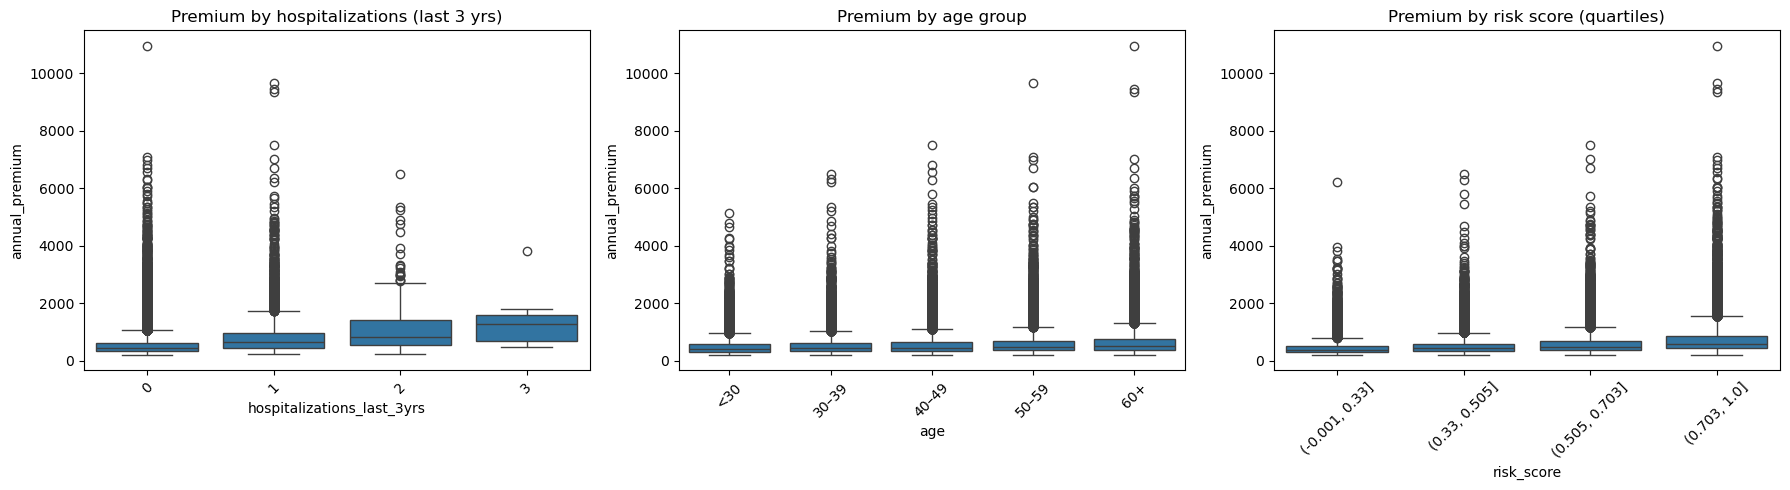

In [13]:
income_candidates = [c for c in df.columns if "annual_premium" in c.lower()] #finding column with 'annual_premium' in its name
if not income_candidates:
    raise ValueError("No column containing 'annual_premium' found. Check df.columns.") #sanity check
income_col = income_candidates[0]   #picking the first match
df_bp = df.copy()

#hospitalizations 
df_bp["hospitalizations_last_3yrs_grp"] = df_bp["hospitalizations_last_3yrs"].astype("Int64")
hosp_order = sorted(df_bp["hospitalizations_last_3yrs_grp"].dropna().unique())

#ages
df_bp["age_grp"] = pd.cut( 
    df_bp["age"],
    bins=[0, 30, 40, 50, 60, 120],
    labels=["<30", "30–39", "40–49", "50–59", "60+"],
    include_lowest=True
)

#risk score quartiles
df_bp["risk_score_grp"] = pd.qcut(df_bp["risk_score"], q=4, duplicates="drop")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#boxplots, one for each variable
sns.boxplot(data=df_bp, x="hospitalizations_last_3yrs_grp", y=income_col, order=hosp_order, ax=axes[0])
axes[0].set_title("Premium by hospitalizations (last 3 yrs)")
axes[0].set_xlabel("hospitalizations_last_3yrs")

sns.boxplot(data=df_bp, x="age_grp", y=income_col, ax=axes[1])
axes[1].set_title("Premium by age group")
axes[1].set_xlabel("age")

sns.boxplot(data=df_bp, x="risk_score_grp", y=income_col, ax=axes[2])
axes[2].set_title("Premium by risk score (quartiles)")
axes[2].set_xlabel("risk_score")

for ax in axes:
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


Automatically preprocesses the dataset by one-hot encoding categorical features and scaling numerical features using a ColumnTransformer

In [14]:
#detect columns from X (not df - only looking at data where target has been removed)
categorical_cols = X.select_dtypes(include=["object"]).columns 
numeric_cols = X.select_dtypes(exclude=["object"]).columns

#build preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols), #onehot encoding
        ("num", RobustScaler(), numeric_cols), #scales numerical features so income (e.g. 80,000) does not dominates bmi (e.g. 22)
    ],
    remainder="drop",
)


In [15]:
#printing attributes with their data types after one-hot encoding
def dtypes_after_onehot(preprocessor, X):
    Xt = preprocessor.fit_transform(X) #applying preprocessor to X
    feature_names = preprocessor.get_feature_names_out() #getting feature names after transformation
    
    #creating dataframe to show feature names and their data types
    df_out = pd.DataFrame({
        "feature": feature_names,
        "dtype": pd.DataFrame(Xt, columns=feature_names).dtypes.values
    })
    
    print(df_out.to_string(index=False))

dtypes_after_onehot(preprocessor, X)


                             feature   dtype
                       cat__sex_Male float64
                      cat__sex_Other float64
                    cat__region_East float64
                   cat__region_North float64
                   cat__region_South float64
                    cat__region_West float64
           cat__urban_rural_Suburban float64
              cat__urban_rural_Urban float64
            cat__education_Doctorate float64
                   cat__education_HS float64
              cat__education_Masters float64
                cat__education_No HS float64
         cat__education_Some College float64
         cat__marital_status_Married float64
          cat__marital_status_Single float64
         cat__marital_status_Widowed float64
      cat__employment_status_Retired float64
cat__employment_status_Self-employed float64
   cat__employment_status_Unemployed float64
                  cat__smoker_Former float64
                   cat__smoker_Never float64
        ca

Checking for low variance or constant features

In [16]:
from sklearn.feature_selection import VarianceThreshold

#constants
constant_features = [col for col in df.columns if df[col].nunique() == 1]

#low variance
numeric_df = df.select_dtypes(include=["number"]) #selecting only numerical columns
selector = VarianceThreshold(threshold=0.01) #setting threshold for low variance
selector.fit(numeric_df)
low_variance_features = numeric_df.columns[~selector.get_support()].tolist() #features with low variance

print("Constant features:", constant_features)
print("Low-variance features:", low_variance_features)


Constant features: []
Low-variance features: []


Train/test split

In [17]:
#hold out test (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#from remaining 80%, carve out validation (10% of total)
#0.10/0.80 = 0.125 of trainval
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.125, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (70000, 44) Val: (10000, 44) Test: (20000, 44)


Evaluating regressor across all models

In [18]:
def evaluate_regressor(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    # predictions
    y_pred_train = model.predict(X_train)
    y_pred_val   = model.predict(X_val)
    y_pred_test  = model.predict(X_test)

    # train metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train  = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100
    r2_train   = r2_score(y_train, y_pred_train)

    # validation metrics
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    mae_val  = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val) * 100
    r2_val   = r2_score(y_val, y_pred_val)

    # test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test  = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
    r2_test   = r2_score(y_test, y_pred_test)

    # print results
    print(f"{name}")
    print(f"Train: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, MAPE={mape_train:.2f}%, R²={r2_train:.3f}")
    print(f"Val:   RMSE={rmse_val:.2f}, MAE={mae_val:.2f}, MAPE={mape_val:.2f}%, R²={r2_val:.3f}")
    print(f"Test:  RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, MAPE={mape_test:.2f}%, R²={r2_test:.3f}")
    print()


Bounded group losss (Fairness criteria) - used after training

In [19]:
def bounded_group_loss(model, X_split, y_split, df_full, C_over=1.0, C_under=10.0):
    #predictions
    y_pred = model.predict(X_split)
    y_true = np.asarray(y_split)

    #align rows
    df_g = df_full.loc[X_split.index].copy()

    #residuals: + underprediction, - overprediction
    resid = y_true - y_pred

    #asymmetric cost
    cost = np.where(
        resid < 0, C_over * np.abs(resid),
        np.where(resid > 0, C_under * np.abs(resid), 0.0)
    )

    df_g["_cost"] = cost

    #age bins
    df_g["age_bin"] = pd.cut(
        df_g["age"],
        bins=[0, 30, 50, 100],
        labels=["<30", "30–50", ">50"],
        include_lowest=True
    )

    #tables
    sex_table = df_g.groupby("sex")["_cost"].mean().to_frame("bounded_group_loss")
    age_table = df_g.groupby("age_bin")["_cost"].mean().to_frame("bounded_group_loss")

    return sex_table, age_table


Dummy Regressor baseline model 

In [20]:
from sklearn.dummy import DummyRegressor

#baseline model pipeline
baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),      
    ("regressor", DummyRegressor(strategy="mean")) #baseline predicting mean value
])

baseline.fit(X_train, y_train)

evaluate_regressor("Baseline (mean)", baseline, X_train, y_train, X_val, y_val, X_test, y_test)


Baseline (mean)
Train: RMSE=402.59, MAE=251.36, MAPE=47.28%, R²=0.000
Val:   RMSE=379.25, MAE=246.28, MAPE=46.92%, R²=-0.000
Test:  RMSE=398.93, MAE=251.30, MAPE=47.17%, R²=-0.000



Linear Regression

In [21]:
#pipeline (running preprocessor + model)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

#train the model (only train set goes into fit)
model.fit(X_train, y_train)

evaluate_regressor("Linear Regression", model, X_train, y_train, X_val, y_val,  X_test, y_test) #evaluate linear regression model



Linear Regression
Train: RMSE=254.78, MAE=152.62, MAPE=26.81%, R²=0.600
Val:   RMSE=240.42, MAE=149.67, MAPE=26.72%, R²=0.598
Test:  RMSE=268.58, MAE=155.82, MAPE=26.93%, R²=0.547



DecisonTreeRegressor

In [22]:
tree = DecisionTreeRegressor(
    max_depth=8,         #limit how deep it can grow
    min_samples_split=20, 
    min_samples_leaf=5,
    random_state=42
)
tree_pipeline = Pipeline(steps=[ 
    ("preprocessor", preprocessor),
    ("regressor", tree)
])

tree_pipeline.fit(X_train, y_train)

evaluate_regressor("Decision Tree", tree_pipeline, X_train, y_train, X_val, y_val, X_test, y_test)

Decision Tree
Train: RMSE=224.56, MAE=128.26, MAPE=22.32%, R²=0.689
Val:   RMSE=221.73, MAE=129.72, MAPE=22.48%, R²=0.658
Test:  RMSE=248.54, MAE=133.88, MAPE=22.52%, R²=0.612



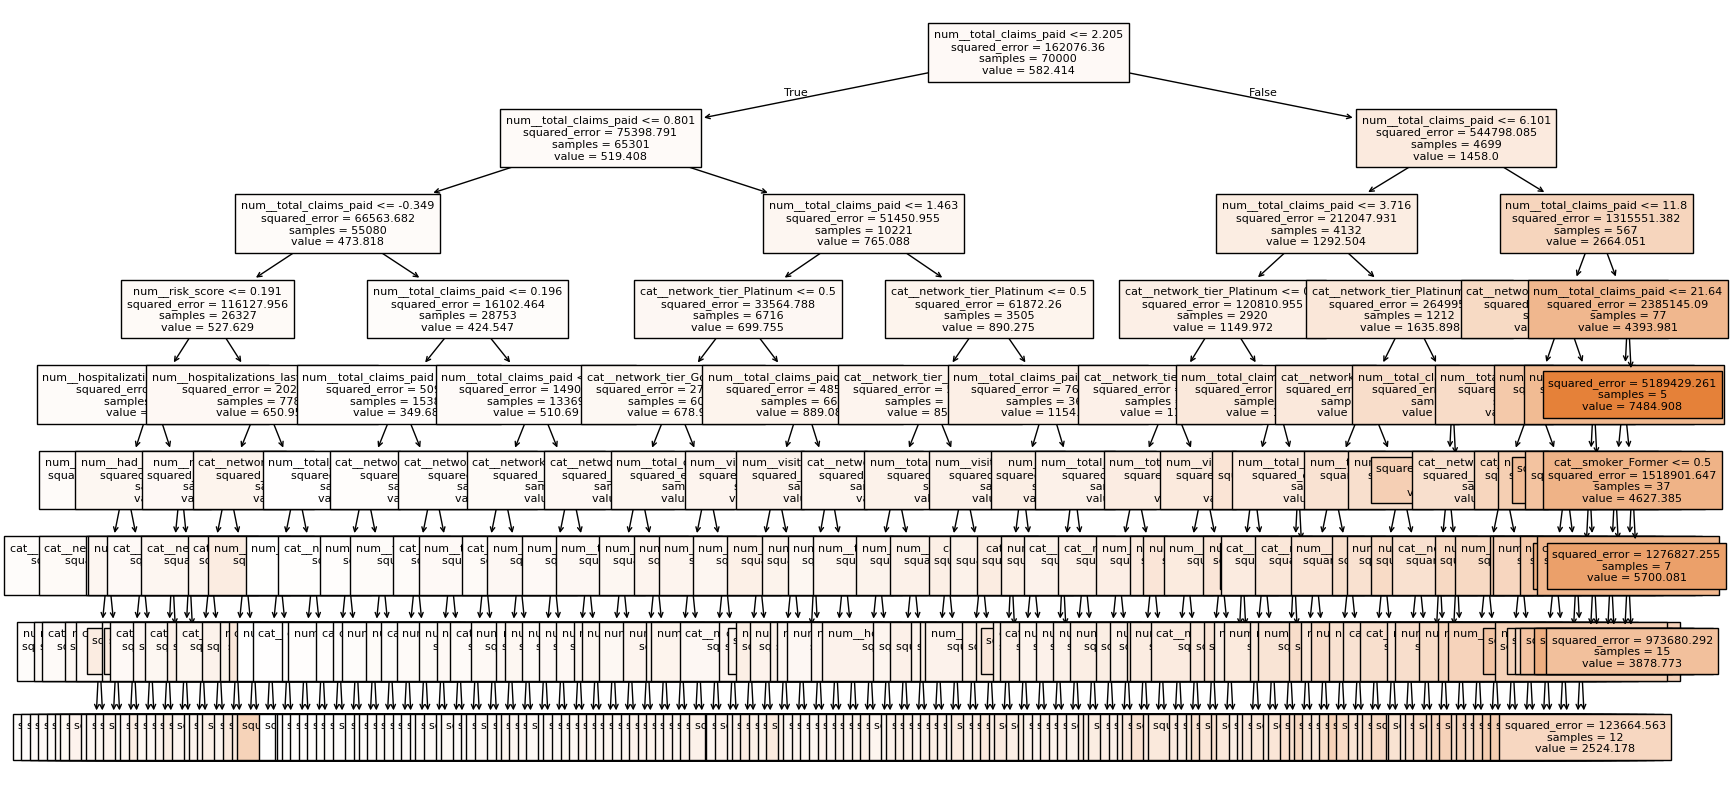

In [23]:
#visualizing Decision tree
from sklearn import tree

feature_names = tree_pipeline.named_steps["preprocessor"].get_feature_names_out() #get feature names after preprocessing


plt.figure(figsize=(20, 10)) #create a bigger figure for better readability

tree.plot_tree(
    tree_pipeline.named_steps["regressor"], #access the decision tree model from the pipeline
    feature_names=feature_names, #use the feature names from preprocessor
    filled=True,
    fontsize=8
)

plt.show()

Ridge and Lasso using 5-fold cross-validation

In [24]:
from sklearn.linear_model import RidgeCV, LassoCV

#define ridge regression pipeline
ridge = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5))
])

#define lasso regression pipeline
lasso = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LassoCV(alphas=[0.001, 0.01, 0.1, 1.0], cv=5, max_iter=5000))
])

#fitting on train
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

#evaluate on train/val/test
evaluate_regressor("Ridge Regression", ridge, X_train, y_train, X_val, y_val,  X_test, y_test)

evaluate_regressor("Lasso Regression", lasso, X_train, y_train, X_val, y_val, X_test, y_test)

print("Ridge best alpha:", ridge.named_steps["regressor"].alpha_)
print("Lasso best alpha:", lasso.named_steps["regressor"].alpha_)

Ridge Regression
Train: RMSE=254.78, MAE=152.61, MAPE=26.81%, R²=0.600
Val:   RMSE=240.42, MAE=149.65, MAPE=26.72%, R²=0.598
Test:  RMSE=268.58, MAE=155.81, MAPE=26.92%, R²=0.547

Lasso Regression
Train: RMSE=254.79, MAE=152.55, MAPE=26.79%, R²=0.599
Val:   RMSE=240.37, MAE=149.51, MAPE=26.68%, R²=0.598
Test:  RMSE=268.58, MAE=155.72, MAPE=26.90%, R²=0.547

Ridge best alpha: 10.0
Lasso best alpha: 0.1


Random Forest (Bagging)

In [25]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("regressor", RandomForestRegressor(
        n_estimators=200, #number of trees
        max_depth=None,   #no limit on depth
        min_samples_split=20, #minimum samples to split
        min_samples_leaf=5, #minimum samples at leaf
        random_state=42, #for reproducibility
        n_jobs=-1 #use all processors
    ))
])

rf.fit(X_train, y_train)

evaluate_regressor("Random Forest", rf, X_train, y_train, X_val, y_val,  X_test, y_test)

Random Forest
Train: RMSE=176.89, MAE=93.54, MAPE=15.90%, R²=0.807
Val:   RMSE=215.69, MAE=126.60, MAPE=22.05%, R²=0.676
Test:  RMSE=241.89, MAE=130.19, MAPE=21.88%, R²=0.632



Impurity-based feature importance (finding the most important features in Random Forest)

                       feature  importance
0            total_claims_paid    0.732779
1        network_tier_Platinum    0.033158
2                   risk_score    0.030632
3            network_tier_Gold    0.019257
4   hospitalizations_last_3yrs    0.015715
5                          ldl    0.012699
6             visits_last_year    0.012486
7                       income    0.012468
8                          bmi    0.011968
9                        hba1c    0.011766
10            provider_quality    0.010900
11                         age    0.010459
12                 systolic_bp    0.009403
13                diastolic_bp    0.008964
14         network_tier_Silver    0.008644
15               chronic_count    0.005707
16           policy_term_years    0.005207
17         had_major_procedure    0.003014
18                  deductible    0.002961
19            medication_count    0.002943


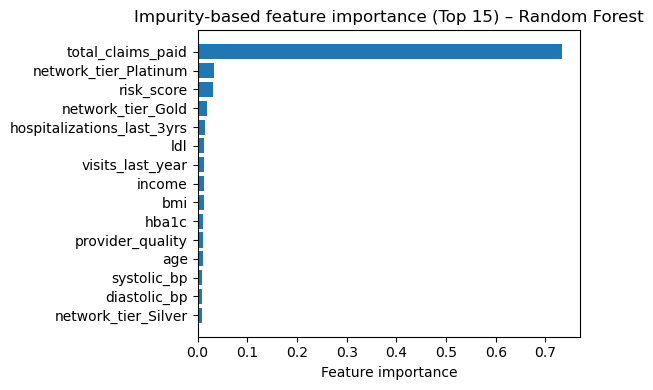

In [26]:
rf_reg = rf.named_steps["regressor"] #accessing the random forest model from the pipeline
importances = rf_reg.feature_importances_

feature_names = rf.named_steps["preprocessor"].get_feature_names_out()

importance_df = pd.DataFrame({ #create dataframe
    "feature": feature_names, #feature names
    "importance": importances #importance values
}).sort_values("importance", ascending=False) #sort by importance descending, so most important features are on top

# clean feature names
importance_df["feature"] = (
    importance_df["feature"] #access feature column
    .str.replace("^num__", "", regex=True) #remove num__ prefix
    .str.replace("^cat__", "", regex=True) #remove cat__ prefix
)

# print clean table (no index)
print(importance_df.head(20).reset_index(drop=True))

# visualize top 15
plt.figure(figsize=(6, 4))
plt.barh(
    importance_df.head(15)["feature"][::-1],
    importance_df.head(15)["importance"][::-1]
)
plt.xlabel("Feature importance")
plt.title("Impurity-based feature importance (Top 15) – Random Forest")
plt.tight_layout()
plt.show()


Permutation feature importance (what happens to Random Forest's model performance when a feature is randomly shuffled)

                   feature  importance
         total_claims_paid  270.572581
              network_tier   33.610424
                risk_score   19.765063
          visits_last_year    6.941997
hospitalizations_last_3yrs    6.259296
             chronic_count    2.722050
                       age    2.393296
       had_major_procedure    0.550321
                       bmi    0.460281
                deductible    0.388038
                    smoker    0.223458
                       ldl    0.189403
                 plan_type    0.129120
                    region    0.110906
               systolic_bp    0.097459


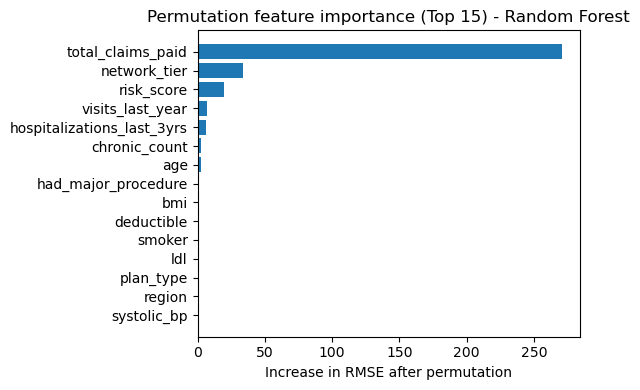

In [27]:
from sklearn.inspection import permutation_importance

#computing permutation importance
perm_result = permutation_importance(
    rf,
    X_val,
    y_val,
    scoring="neg_root_mean_squared_error",
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

#building dataframe
perm_df = pd.DataFrame({
    "feature": X_val.columns,
    "importance": perm_result.importances_mean
}).sort_values("importance", ascending=False) #sorting by importance descending

#print top 15 (no index)
print(perm_df.head(15).to_string(index=False))

#plotting top 15
top_n = 15
plot_df = perm_df.head(top_n).iloc[::-1]

plt.figure(figsize=(6, 4))
plt.barh(plot_df["feature"], plot_df["importance"])
plt.xlabel("Increase in RMSE after permutation")
plt.title("Permutation feature importance (Top 15) - Random Forest")
plt.tight_layout()
plt.show()

In [28]:
#running bounded group loss for Random Forest
rf_sex_loss, rf_age_loss = bounded_group_loss(
    model=rf,
    X_split=X_test,
    y_split=y_test,
    df_full=df,
    C_over=1,
    C_under=10
)

print("Bounded group loss by sex") 
display(rf_sex_loss)

print("Bounded group loss by age")
display(rf_age_loss)

Bounded group loss by sex


/var/folders/3f/2x1hpgqj53jc2g91mv6vjwsr0000gn/T/ipykernel_350/2691992674.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_table = df_g.groupby("age_bin")["_cost"].mean().to_frame("bounded_group_loss")


,bounded_group_loss
sex,
Female,726.128312
Male,714.663136
Other,600.689731


Bounded group loss by age


,bounded_group_loss
age_bin,
<30,585.272152
30–50,672.643408
>50,809.912579


Gradient Boosting

In [29]:
gbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=275, #number of boosting stages
        learning_rate=0.05, #shrinkage factor
        max_depth=3, #maximum depth of individual estimators
        random_state=42 #for reproducibility
    ))
])

gbr.fit(X_train, y_train)

evaluate_regressor( "Gradient Boosting", gbr, X_train, y_train,  X_val, y_val, X_test, y_test)

Gradient Boosting
Train: RMSE=221.33, MAE=126.59, MAPE=22.13%, R²=0.698
Val:   RMSE=212.81, MAE=126.65, MAPE=22.37%, R²=0.685
Test:  RMSE=239.91, MAE=130.30, MAPE=22.19%, R²=0.638



In [30]:
#running bounded group loss for Gradient Boosting
gbr_sex_loss, gbr_age_loss = bounded_group_loss(
    model=gbr,
    X_split=X_test, #using test set
    y_split=y_test,
    df_full=df, 
    C_over=1, #overprediction cost
    C_under=10 #underprediction cost
)

print("Bounded group loss by sex")
display(gbr_sex_loss)

print("Bounded group loss by age")
display(gbr_age_loss)

Bounded group loss by sex


/var/folders/3f/2x1hpgqj53jc2g91mv6vjwsr0000gn/T/ipykernel_350/2691992674.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_table = df_g.groupby("age_bin")["_cost"].mean().to_frame("bounded_group_loss")


,bounded_group_loss
sex,
Female,740.495224
Male,734.405410
Other,622.771057


Bounded group loss by age


,bounded_group_loss
age_bin,
<30,611.575461
30–50,696.832095
>50,816.750987


XGBoost

In [31]:
from xgboost import XGBRegressor

xgbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=275,        #number of trees
        learning_rate=0.05,      #step size shrinkage
        max_depth=5,             #tree depth
        subsample=0.8,           #row sampling
        colsample_bytree=0.8,    #column sampling per tree
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgbr.fit(X_train, y_train)

evaluate_regressor("XGBoost", xgbr, X_train, y_train, X_val, y_val, X_test, y_test)

XGBoost
Train: RMSE=209.70, MAE=121.60, MAPE=21.30%, R²=0.729
Val:   RMSE=214.14, MAE=125.79, MAPE=21.94%, R²=0.681
Test:  RMSE=244.31, MAE=129.81, MAPE=21.80%, R²=0.625



GridSearch KNN - systematic hyperparameter tuning with 5-fold cross-validation

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning for KNN
param_grid_knn = {
    "regressor__n_neighbors": [3, 5, 7, 10, 12, 15, 20, 30, 40, 100, 200], #try different k values
    "regressor__weights": ["uniform", "distance"] #try both uniform and distance weighting, where closer neighbors have more influence
}

#create KNN regression pipeline
knn_base = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor())
])

#grid search with 5-fold cross-validation
grid_knn = GridSearchCV(
    knn_base,
    param_grid_knn,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

#fit grid search
grid_knn.fit(X_train, y_train)
print("Best params KNN:", grid_knn.best_params_)

evaluate_regressor("KNN (tuned)", grid_knn.best_estimator_,  X_train, y_train,  X_val, y_val, X_test, y_test)

Best params KNN: {'regressor__n_neighbors': 30, 'regressor__weights': 'distance'}
KNN (tuned)
Train: RMSE=0.00, MAE=0.00, MAPE=0.00%, R²=1.000
Val:   RMSE=260.67, MAE=157.75, MAPE=26.84%, R²=0.528
Test:  RMSE=288.53, MAE=164.73, MAPE=27.20%, R²=0.477



Creating a table for all of our results

In [33]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

#list to store results from all models
results = []

def evaluate_regressor(name, model, X_train, X_val, X_test, y_train, y_val, y_test):
    #predictions
    y_pred_train = model.predict(X_train)
    y_pred_val   = model.predict(X_val)
    y_pred_test  = model.predict(X_test)

    #errors
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val   = mean_squared_error(y_val, y_pred_val)
    mse_test  = mean_squared_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_val   = np.sqrt(mse_val)
    rmse_test  = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_val   = mean_absolute_error(y_val, y_pred_val)
    mae_test  = mean_absolute_error(y_test, y_pred_test)

    mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100
    mape_val   = mean_absolute_percentage_error(y_val, y_pred_val) * 100
    mape_test  = mean_absolute_percentage_error(y_test, y_pred_test) * 100

    r2_train = r2_score(y_train, y_pred_train)
    r2_val   = r2_score(y_val, y_pred_val)
    r2_test  = r2_score(y_test, y_pred_test)

    print(f"{name}")
    print(f"Train: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, MAPE={mape_train:.2f}%, R²={r2_train:.3f}")
    print(f"Val:   RMSE={rmse_val:.2f}, MAE={mae_val:.2f}, MAPE={mape_val:.2f}%, R²={r2_val:.3f}")
    print(f"Test:  RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, MAPE={mape_test:.2f}%, R²={r2_test:.3f}")
    print()

    #store results
    results.append({
        "model": name,
        "rmse_train": rmse_train,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "mae_train": mae_train,
        "mae_val": mae_val,
        "mae_test": mae_test,
        "mape_train": mape_train,
        "mape_val": mape_val,
        "mape_test": mape_test,
        "r2_train": r2_train,
        "r2_val": r2_val,
        "r2_test": r2_test
    })


# evaluate models
evaluate_regressor("Linear Regression", model, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Baseline (mean)", baseline, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Decision Tree", tree_pipeline, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Ridge Regression", ridge, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Lasso Regression", lasso, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Random Forest", rf, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Gradient Boosting", gbr, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("XGBoost", xgbr, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Grid KNN", grid_knn.best_estimator_, X_train, X_val, X_test, y_train, y_val, y_test)

#results table
results_df = pd.DataFrame(results)

#round for nicer display
results_df_rounded = results_df.copy()
results_df_rounded[
    ["rmse_train","rmse_val","rmse_test",
     "mae_train","mae_val","mae_test",
     "mape_train","mape_val","mape_test",
     "r2_train","r2_val","r2_test"]
] = results_df_rounded[
    ["rmse_train","rmse_val","rmse_test",
     "mae_train","mae_val","mae_test",
     "mape_train","mape_val","mape_test",
     "r2_train","r2_val","r2_test"]
].round(3)

#sort by best (lowest) validation RMSE
display(results_df_rounded.sort_values("rmse_val"))


Linear Regression
Train: RMSE=254.78, MAE=152.62, MAPE=26.81%, R²=0.600
Val:   RMSE=240.42, MAE=149.67, MAPE=26.72%, R²=0.598
Test:  RMSE=268.58, MAE=155.82, MAPE=26.93%, R²=0.547

Baseline (mean)
Train: RMSE=402.59, MAE=251.36, MAPE=47.28%, R²=0.000
Val:   RMSE=379.25, MAE=246.28, MAPE=46.92%, R²=-0.000
Test:  RMSE=398.93, MAE=251.30, MAPE=47.17%, R²=-0.000

Decision Tree
Train: RMSE=224.56, MAE=128.26, MAPE=22.32%, R²=0.689
Val:   RMSE=221.73, MAE=129.72, MAPE=22.48%, R²=0.658
Test:  RMSE=248.54, MAE=133.88, MAPE=22.52%, R²=0.612

Ridge Regression
Train: RMSE=254.78, MAE=152.61, MAPE=26.81%, R²=0.600
Val:   RMSE=240.42, MAE=149.65, MAPE=26.72%, R²=0.598
Test:  RMSE=268.58, MAE=155.81, MAPE=26.92%, R²=0.547

Lasso Regression
Train: RMSE=254.79, MAE=152.55, MAPE=26.79%, R²=0.599
Val:   RMSE=240.37, MAE=149.51, MAPE=26.68%, R²=0.598
Test:  RMSE=268.58, MAE=155.72, MAPE=26.90%, R²=0.547

Random Forest
Train: RMSE=176.89, MAE=93.54, MAPE=15.90%, R²=0.807
Val:   RMSE=215.69, MAE=126.60, MA

,model,rmse_train,rmse_val,rmse_test,mae_train,mae_val,mae_test,mape_train,mape_val,mape_test,r2_train,r2_val,r2_test
6,Gradient Boosting,221.327,212.814,239.906,126.589,126.654,130.303,22.134,22.367,22.195,0.698,0.685,0.638
7,XGBoost,209.700,214.141,244.306,121.598,125.795,129.812,21.301,21.944,21.804,0.729,0.681,0.625
5,Random Forest,176.891,215.695,241.890,93.539,126.597,130.185,15.903,22.047,21.880,0.807,0.676,0.632
2,Decision Tree,224.560,221.727,248.540,128.259,129.723,133.881,22.319,22.481,22.518,0.689,0.658,0.612
4,Lasso Regression,254.792,240.369,268.580,152.552,149.509,155.716,26.791,26.683,26.901,0.599,0.598,0.547
3,Ridge Regression,254.777,240.421,268.578,152.611,149.649,155.811,26.806,26.717,26.924,0.600,0.598,0.547
0,Linear Regression,254.777,240.425,268.576,152.622,149.666,155.820,26.808,26.721,26.926,0.600,0.598,0.547
8,Grid KNN,0.000,260.671,288.530,0.000,157.748,164.735,0.000,26.836,27.200,1.000,0.528,0.477
1,Baseline (mean),402.587,379.248,398.931,251.358,246.280,251.295,47.276,46.917,47.171,0.000,-0.000,-0.000


Error analysis (residual)

In [34]:
def error_analysis( 
    model, X, y,
    *,
    title="Error analysis",
    top_k=10,
    studentize_if_linear=True,
    max_p_for_studentize=2000,
    max_n_for_studentize=5000,
):

    #predictions & residuals
    y_true = np.asarray(y) 
    y_hat = model.predict(X) 
    resid = y_true - y_hat #residuals, y - y_hat, positive = underprediction

    #standardized residuals (always works)
    resid_std = (resid - resid.mean()) / (resid.std(ddof=1) + 1e-12)

    #try studentized residuals for linear models
    rstudent = None
    did_studentize = False

    if studentize_if_linear:
        #identify regressor inside pipeline if present
        reg = model.named_steps.get("regressor", None) if hasattr(model, "named_steps") else None #get regressor step, or None
        linear_like = reg is not None and reg.__class__.__name__ in { #set of linear model class names
            "LinearRegression", "Ridge", "RidgeCV", "Lasso", "LassoCV", "ElasticNet", "ElasticNetCV"
        }

        if linear_like and hasattr(model, "named_steps") and "preprocessor" in model.named_steps: #check preprocessor exists
            Z = model.named_steps["preprocessor"].transform(X) #get design matrix after preprocessing

            #handle sparse/dense safely (your old code did .toarray() before checking)
            if hasattr(Z, "toarray"):
                #only densify if not too large
                n, p0 = Z.shape
                if n <= max_n_for_studentize and p0 <= max_p_for_studentize:
                    Z = Z.toarray()
                else:
                    Z = None  #skip studentization if too large
            else:
                n, p0 = Z.shape
                if n > max_n_for_studentize or p0 > max_p_for_studentize:
                    Z = None

            if Z is not None:
                #add intercept column
                X_design = np.c_[np.ones(Z.shape[0]), Z] #design matrix with intercept
                n, p = X_design.shape

                #MSE with correct dof
                dof = max(n - p, 1)
                mse = np.sum(resid**2) / dof

                #leverage h = diag(X (X'X)^-1 X')
                XtX_inv = np.linalg.pinv(X_design.T @ X_design)
                h = np.sum((X_design @ XtX_inv) * X_design, axis=1)
                h = np.clip(h, 0, 1 - 1e-8)

                rstudent = resid / (np.sqrt(mse) * np.sqrt(1 - h) + 1e-12)
                did_studentize = True

    #choose what to plot in second panel
    second = rstudent if did_studentize else resid_std #standardized residuals, if no studentized
    second_label = "Studentized residuals" if did_studentize else "Standardized residuals (z-score)" 
    second_title = "Studentized vs Fitted" if did_studentize else "Standardized vs Fitted"

    #plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    #residuals vs fitted
    axes[0].scatter(y_hat, resid, alpha=0.6)
    axes[0].axhline(0, linestyle="--")
    axes[0].set_xlabel("Fitted values (ŷ)")
    axes[0].set_ylabel("Residuals (y - ŷ)")
    axes[0].set_title(f"{title}: Residuals vs Fitted")

    #studentized/standardized residuals vs fitted
    axes[1].scatter(y_hat, second, alpha=0.6)
    axes[1].axhline(0, linestyle="--")
    axes[1].axhline(3, linestyle="--")
    axes[1].axhline(-3, linestyle="--")
    axes[1].set_xlabel("Fitted values (ŷ)")
    axes[1].set_ylabel(second_label)
    axes[1].set_title(f"{title}: {second_title}")

    plt.tight_layout()
    plt.show()

    # outlier table (top_k absolute residuals)
    df_out = X.copy()
    df_out = df_out.assign(
        y_true=y_true,
        y_pred=y_hat,
        resid=resid,
        abs_resid=np.abs(resid)
    ).sort_values("abs_resid", ascending=False)

    #keeping it readable
    cols = list(X.columns) if hasattr(X, "columns") else []
    show_cols = cols[: min(len(cols), 12)] + ["y_true", "y_pred", "resid", "abs_resid"]

    return df_out[show_cols].head(top_k)

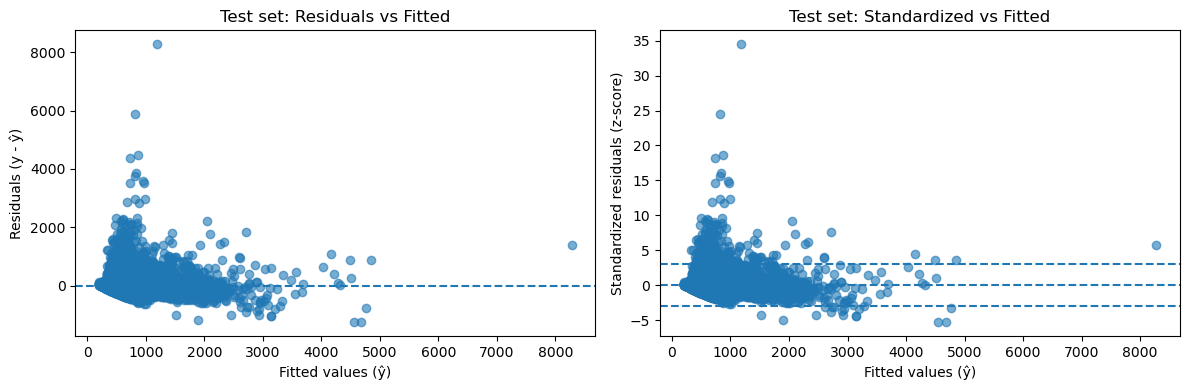

,age,sex,region,urban_rural,income,education,marital_status,employment_status,dependents,bmi,smoker,alcohol_freq,y_true,y_pred,resid,abs_resid
3616,64,Female,East,Rural,29700.0,Bachelors,Married,Self-employed,0,23.2,Never,Occasional,9461.36,1186.986814,8274.373186,8274.373186
81772,75,Female,South,Suburban,15800.0,No HS,Single,Unemployed,3,31.8,Current,Occasional,6703.61,814.063223,5889.546777,5889.546777
75091,60,Female,North,Urban,40300.0,No HS,Single,Employed,1,28.6,Current,daily,5356.06,865.898516,4490.161484,4490.161484
87684,45,Female,West,Urban,2400.0,Masters,Divorced,Employed,2,31.4,Current,daily,5099.76,729.314127,4370.445873,4370.445873
938,33,Male,Central,Rural,25200.0,HS,Widowed,Self-employed,0,26.5,Never,Occasional,4694.91,840.475294,3854.434706,3854.434706
26845,48,Male,Central,Urban,4800.0,Some College,Divorced,Unemployed,1,23.1,Current,Occasional,4562.42,818.563078,3743.856922,3743.856922
76341,63,Female,East,Urban,11100.0,HS,Single,Employed,1,29.6,Current,Occasional,4540.43,953.969523,3586.460477,3586.460477
28951,28,Male,North,Urban,63400.0,HS,Married,Self-employed,1,24.9,Current,Occasional,4258.83,727.294247,3531.535753,3531.535753
78884,61,Female,North,Suburban,49500.0,HS,Married,Unemployed,1,29.0,Never,Weekly,4476.21,973.857441,3502.352559,3502.352559
63189,79,Female,East,Urban,13600.0,HS,Married,Employed,2,29.1,Current,Occasional,3972.34,993.551479,2978.788521,2978.788521


In [35]:
#visualizing residucal errors
best_model = gbr  

top_errors = error_analysis( 
    best_model,
    X_test,
    y_test,
    title="Test set",
    top_k=10,
    studentize_if_linear=True  # gør kun noget for lineære modeller
)

display(top_errors)

Expected cost calculation

In [36]:
def asymmetric_error_cost(y_true, y_pred, *, over_cost=1.0, under_cost=10.0): #compute asymmetric cost

    y_true = np.asarray(y_true) #convert to numpy array
    y_pred = np.asarray(y_pred) 

    under = np.maximum(y_true - y_pred, 0)  #only when prediction is too low
    over  = np.maximum(y_pred - y_true, 0)  #only when prediction is too high

    return under_cost * under + over_cost * over


#compute expected cost for a model, dataset, and cost parameters, averaged over all samples
def expected_cost(model, X, y, *, over_cost=1.0, under_cost=10.0): #compute expected cost
    y_pred = model.predict(X)
    return asymmetric_error_cost(y, y_pred, over_cost=over_cost, under_cost=under_cost).mean() #average cost over all samples

#compute expected value (cost reduction) of a model vs. a baseline model
def expected_value_vs_baseline(baseline_model, model, X, y, *, over_cost=1.0, under_cost=10.0): #compute expected value vs. baseline
    base = expected_cost(baseline_model, X, y, over_cost=over_cost, under_cost=under_cost)
    new  = expected_cost(model,          X, y, over_cost=over_cost, under_cost=under_cost)
    return base - new, base, new  #(gain, baseline_cost, model_cost)

#compute expected value on test set for GB vs. baseline
gain, cost_base, cost_model = expected_value_vs_baseline(
    baseline,gbr, X_test, y_test,
    over_cost=1.0, under_cost=10.0
)

print("Business-oriented evaluation (test set)")
print(f"Expected cost baseline: {cost_base:.2f}")
print(f"Expected cost model:    {cost_model:.2f}")
print(f"Expected value (gain):  {gain:.2f}")

Business-oriented evaluation (test set)
Expected cost baseline: 1389.82
Expected cost model:    735.13
Expected value (gain):  654.69


In [37]:
#creating a table for expected value
best_model = gbr  
C_over  = 1.0
C_under = 10.0

y_pred = best_model.predict(X_test)
e = y_test.to_numpy() - y_pred  #y_true - y_pred

df_table = X_test.copy()
df_table["y_true"] = y_test.values
df_table["y_pred"] = y_pred
df_table["e"] = e

df_table["over_under"] = np.where(e > 0, "under", np.where(e < 0, "over", "exact"))

#cost: under when e>0, over when e<0
df_table["cost"] = np.where(e > 0, C_under * e, np.where(e < 0, C_over * (-e), 0.0))

display(df_table[["y_true","y_pred","e","over_under","cost"]].head(10))

,y_true,y_pred,e,over_under,cost
75721,367.52,431.911428,-64.391428,over,64.391428
80184,426.43,329.642666,96.787334,under,967.873341
19864,351.16,442.597472,-91.437472,over,91.437472
76699,368.70,595.045748,-226.345748,over,226.345748
92991,904.41,725.533610,178.876390,under,1788.763905
76434,582.71,528.813565,53.896435,under,538.964347
84004,318.33,308.954717,9.375283,under,93.752832
80917,288.54,446.817022,-158.277022,over,158.277022
60767,302.55,401.093801,-98.543801,over,98.543801
50074,1055.90,1318.084494,-262.184494,over,262.184494


                                ALL CODE BELOW BELONGS TO CLUSTERING (not for this project, but is made out of curiosity)

Prepping for clustering with KMeans

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#scale numeric data so the features hold the same weight
X_num = df[numeric_cols]
X_scaled = RobustScaler().fit_transform(X_num) 

inertias = [] #list to store inertia values
silhouettes = [] #list to store silhouette scores
k_values = range(2, 8)

#asking KMeans to make k clusters
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42) #initialize KMeans
    labels = km.fit_predict(X_scaled) #fit and predict cluster labels

    inertias.append(km.inertia_) #store inertia
    silhouettes.append(silhouette_score(X_scaled, labels)) #store silhouette score

print("Inertias:", inertias)
print("Silhouettes:", silhouettes)

Exception ignored in: <function ResourceTracker.__del__ at 0x1024adbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1070b9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105411bc0>
Traceback (most recent call last

Inertias: [1388330.0592733468, 1268601.773694207, 1206565.936038752, 1145167.1574455234, 1112906.1048888068, 1079494.181906183]
Silhouettes: [np.float64(0.21683421812911932), np.float64(0.14675811020166488), np.float64(0.13757117915867342), np.float64(0.11233846394762159), np.float64(0.05434539824943197), np.float64(0.07173089097015013)]


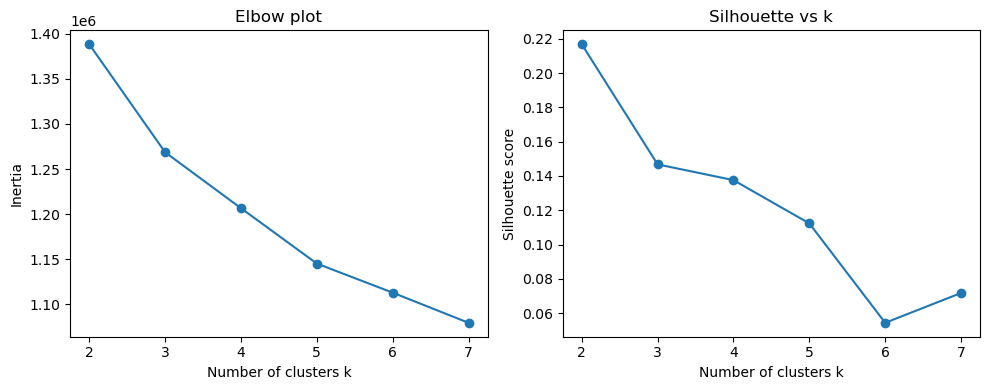

In [39]:
k_values = range(2, 8)

plt.figure(figsize=(10,4))

#elbow (inertia)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Elbow plot")

#silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")

plt.tight_layout()
plt.show()

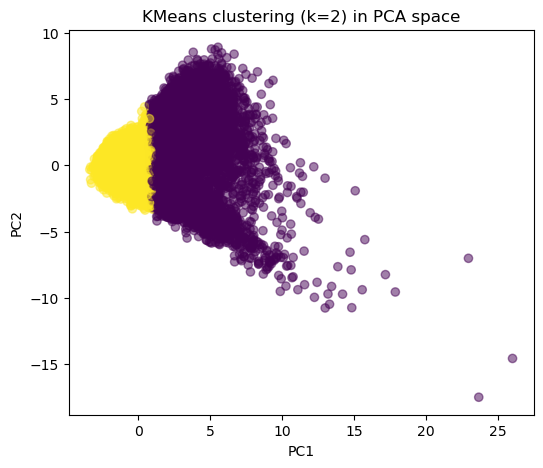

               age        income  dependents        bmi  visits_last_year  \
cluster                                                                     
0        53.531541  50023.518925    0.902267  27.195790          3.504891   
1        45.838590  49832.010650    0.897291  26.933031          1.485997   

         hospitalizations_last_3yrs  medication_count  systolic_bp  \
cluster                                                              
0                          0.139651          1.852670   125.872600   
1                          0.080756          1.063732   115.551021   

         diastolic_bp         ldl  ...  cancer_history  kidney_disease  \
cluster                            ...                                   
0           77.619720  121.718399  ...        0.043107        0.029439   
1           72.480518  119.486903  ...        0.015463        0.010471   

         liver_disease  arthritis  mental_health  proc_imaging_count  \
cluster                                  

In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#choosing k= 2 because that is our best silhouette
best_k = 2

km = KMeans(n_clusters=best_k, random_state=42, n_init=1, max_iter=100) #initialize KMeans, n_init=1 for reproducibility, max_iter=100 to ensure convergence
labels = km.fit_predict(X_scaled) #fit and predict cluster labels

#project to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans clustering (k={best_k}) in PCA space")
plt.show()

#taking the mean of every value in each cluster
df_clusters = df.copy()
df_clusters["cluster"] = labels

print(df_clusters.groupby("cluster")[numeric_cols].mean())

Måske ikke pensum: Fairness check by gender (or similar column) AND Fairness / group comparison by age groups

In [41]:
#choose main model for evaluation / fairness checks
#(change to model if we prefer another)
best_model = gbr

#predictions for all rows in the original X
y_pred_all = best_model.predict(X)

df_eval = df.copy()
df_eval["y_true"] = y
df_eval["y_pred"] = y_pred_all

#inspect categorical columns so you know what you can group by
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns in the data:", cat_cols)

#choose a categorical column to check fairness / group differences
#change if our dataset uses another name (e.g. "gender", "smoker", "region")
group_col = "sex"   #try "sex" first; if that doesn't exist, change to one of cat_cols above

if group_col in df_eval.columns:
    print(f"\nAverage true & predicted annual_premium by {group_col}:")
    print(
        df_eval.groupby(group_col)[["y_true", "y_pred"]].mean()
    )
else:
    print(f"\nColumn {group_col!r} not found. "
          f"Set group_col to one of these: {cat_cols}")

#age-group comparison (only if an 'age' column exists)
age_col = "age"     #change if your age column has another name

if age_col in df_eval.columns:
    df_eval["age_bin"] = pd.cut(
        df_eval[age_col],
        bins=[0, 30, 50, 100],
        labels=["<30", "30–50", ">50"]
    )

    print("\nAverage true & predicted annual_premium by age group:")
    print(
        df_eval.groupby("age_bin")[["y_true", "y_pred"]].mean()
    )
else:
    print(f"\nColumn {age_col!r} not found – skipping age-group analysis.")

Categorical columns in the data: ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']

Average true & predicted annual_premium by sex:
            y_true      y_pred
sex                           
Female  581.021291  580.855682
Male    583.772792  583.300080
Other   578.844511  579.712694

Average true & predicted annual_premium by age group:
             y_true      y_pred
age_bin                        
<30      510.824094  512.520375
30–50    558.129207  556.478599
>50      631.151317  631.527071


/var/folders/3f/2x1hpgqj53jc2g91mv6vjwsr0000gn/T/ipykernel_350/1468698898.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eval.groupby("age_bin")[["y_true", "y_pred"]].mean()
